# Tutorial 06 (part 1): Deep fully-connected neural networks with Keras 
by Dr Ivan Olier-Caparroso, last updated: Feb-22

## Introduction
The aim with this tutorial is to get familiar with deep learning model implementations in *keras*. With this one in particular, we will practise how to implement deep dense feedforward neural networks, and what can we do to control for overfitting.

It is good practice to start with a cleaned Python kernel. In order to do it, you can choose one of the options from the *Kernel* menu that start with *Restart kernel ...*.

As in previous tutorial, we should import the required packages first. We don't need to import everything from the beginning, but it is good practice to do it so.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

## Dataset
We can learn the basics of *Keras* by walking through a simple example: recognising handwritten digits from the MNIST dataset. MNIST consists of 28 x 28 grayscale images of handwritten digits like these:

![](imgs/mnist_pic.png)

The MNIST dataset is included with *Keras* and can be accessed using the `dataset_mnist()` function. 
* Here we load the dataset then create variables for our test and training data:

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's inspect a few examples. The *MNIST* dataset contains only grayscale images. For more advanced image datasets, we'll have the three color channels (RGB).

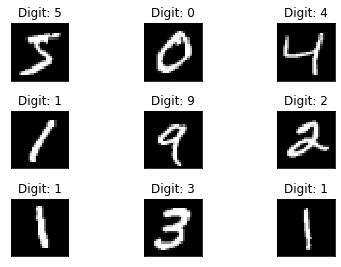

In [ ]:
plt.figure(facecolor='w')
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In order to train our neural network to classify images we first have to unroll the height $\times$ width pixel format into one big vector - the input vector. So its length must be $28 \cdot 28 = 784$. But let's graph the distribution of our pixel values.

Text(0.5, 1.0, 'Pixel Value Distribution')

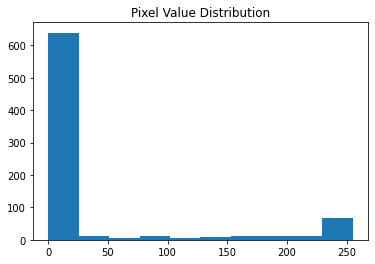

In [ ]:
plt.figure()
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

Dense feedforward neural networks expect a matrix (2-d array, with rows the observations and columns the features or variables). Therefore, we need to prepare the data for training by converting the 3-d arrays into matrices by reshaping width and height into a single dimension (28x28 images are flattened into length 784 vectors). Then, we convert the greyscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1 (that is, we normalise the data):

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test /= 255

Therefore, the new data array dimensions are:

In [ ]:
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


So far the truth we'll use for training still holds integer values from 0 to 9.

In [ ]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


Let's encode our categories - digits from 0 to 9 - using *one-hot encoding*. The result is a vector with a length equal to the number of categories. The vector is all zeroes except in the position for the respective category. Thus a '$5$' will be represented by $[0,0,0,0,1,0,0,0,0]$.

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Building a first network
We aim to build a first architecture as the one in the below figure:
![](imgs/mlp_mnist1.jpg)

The network consists of:
* An input layer of 784 input features.
* Two hidden layers of 512 neurons each. We will use `relu` activation function for all neurons in the hidden layers.
* An output layer of 10 neurons, one for each class. Their activation functions are `softmax` - they will provide relative class probability.  

In [ ]:
model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Notice the number of parameters to learn. All of them are either connection weights or biases. 

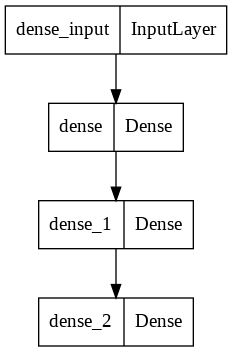

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1)

Now, let's set up the optimiser and performance metrics. See the code below:

In [ ]:
model1.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='adam'
)

We are using *ADAM* this time. Please, refer to the lecture slides for more information. We are ready to train the model. Notice in the code below that I'm using `verbose=0`, which means that partial training outcomes won't be prompted. This will significantly increase training speed. I also use that mode here so I do not clutter this document. But feel free to change the verbose mode. You can check the documentation for other options. Other arguments of function `fit` are `epochs` (30, but you could see that a smaller number could also work), `batch_size` (128), and `validation_split` (0.2, 20\% of training subset will be used for validation). The batch size is usually chosen according to the length of the dataset and the expected number of epochs to reach convergence. We have 7,000 rows in the training set hence a batch no larger than 1,000 makes sense. Smaller batches will lead to bumpier learning curves but the algorithm will run faster.

In [ ]:
history = model1.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 6s 15ms/step - loss: 0.2434 - accuracy: 0.9279 - val_loss: 0.1185 - val_accuracy: 0.9643
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0873 - accuracy: 0.9735 - val_loss: 0.0894 - val_accuracy: 0.9734
Epoch 3/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0541 - accuracy: 0.9837 - val_loss: 0.0754 - val_accuracy: 0.9768
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0843 - val_accuracy: 0.9766
Epoch 5/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0909 - val_accuracy: 0.9745
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0234 - accuracy: 0.9919 - val_loss: 0.1028 - val_accuracy: 0.9754
Epoch 7/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.1039 - val_accuracy: 0.9742

As before, we can implement a quick function to plot learning curves:

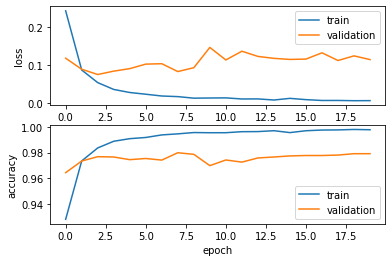

In [ ]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    return;

plot_history(history)

## Exercise

Before we carry on with the rest of the tutorial, let's stop for a minute here to reflect on above results. 

1. What are the training and validation losses and accuracies at epoch 10?
2. What can you tell about model performance?
3. Write a line of code to estimate model accuracy on the test subset. How test accuracy compares against training accuracy? comments?

### Solution

In [ ]:
test_scores_model1 = model1.evaluate(X_test, y_test, verbose=0)
print("Test loss model 1:", test_scores_model1[0])
print("Test accuracy model 1:", test_scores_model1[1])
train_scores_model1 = model1.evaluate(X_train, y_train, verbose=0)
print("Train loss model 1:", train_scores_model1[0])
print("Train accuracy model 1:", train_scores_model1[1])

Test loss model 1: 0.1253509223461151
Test accuracy model 1: 0.9783999919891357
Train loss model 1: 0.02661045268177986
Train accuracy model 1: 0.9947333335876465


## Controlling for overfitting
Prior model is overfitted. That is, the model has learnt the training set extremely well, but struggles with test sets that have not been seen by the model during learning. As studied in the lecture slides, the key to control for overfitting is to have a good balance between the amount of data available and model complexity (i.e. the number of free parameters that need to be learnt). One way to reduce the risk of overfitting is by getting more data. Depending on the application, this could pose lot of challenges like the increasing cost of recording the data, or perhaps because there is no way to get more (historic data). Alternatively, we can attempt to reduce model complexity. In deep learning, one common way to do it is by dropping neurons out during the training hence the number of free parameters are reduced. We do this in the folowing code:

In [ ]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(784,)))
model2.add(Dropout(rate=0.4))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(rate=0.4))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


The function `Dropout` will do exactly that. The dropping rate is controlled by the argument `rate`. Now we can just carry on with the rest of the steps to build the model as before:

In [ ]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model2.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 7s 16ms/step - loss: 0.3415 - accuracy: 0.8948 - val_loss: 0.1289 - val_accuracy: 0.9616
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.1488 - accuracy: 0.9544 - val_loss: 0.0945 - val_accuracy: 0.9711
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.1129 - accuracy: 0.9653 - val_loss: 0.0863 - val_accuracy: 0.9739
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0892 - accuracy: 0.9725 - val_loss: 0.0829 - val_accuracy: 0.9746
Epoch 5/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0767 - accuracy: 0.9754 - val_loss: 0.0769 - val_accuracy: 0.9773
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0709 - accuracy: 0.9780 - val_loss: 0.0740 - val_accuracy: 0.9775
Epoch 7/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0610 - accuracy: 0.9804 - val_loss: 0.0790 - val_accuracy: 0.9770

If we produce the learning curve plots, we can observe the gap between training and validation has considerably shrank:

In [ ]:
test_scores_model2 = model2.evaluate(X_test, y_test, verbose=0)
print("Test loss model 2:", test_scores_model2[0])
print("Test accuracy model 2:", test_scores_model2[1])
train_scores_model2 = model2.evaluate(X_train, y_train, verbose=0)
print("Train loss model 2:", train_scores_model2[0])
print("Train accuracy model 2:", train_scores_model2[1])

Test loss model 2: 0.06699377298355103
Test accuracy model 2: 0.9836000204086304
Train loss model 2: 0.019545041024684906
Train accuracy model 2: 0.9950833320617676


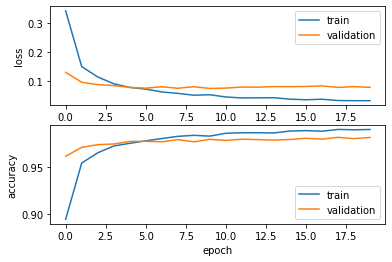

In [ ]:
plot_history(history)

In [ ]:
from tensorflow.keras.layers import Dropout

model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dropout(rate=0.4))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(rate=0.4))
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')
history = model3.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 7s 16ms/step - loss: 1.5258 - accuracy: 0.5440 - val_loss: 0.6985 - val_accuracy: 0.8428
Epoch 2/20
375/375 [==============================] - 6s 17ms/step - loss: 0.7408 - accuracy: 0.7807 - val_loss: 0.4363 - val_accuracy: 0.8855
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.5622 - accuracy: 0.8311 - val_loss: 0.3636 - val_accuracy: 0.8984
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.4892 - accuracy: 0.8552 - val_loss: 0.3253 - val_accuracy: 0.9082
Epoch 5/20
375/375 [==============================] - 6s 15ms/step - loss: 0.4436 - accuracy: 0.8684 - val_loss: 0.2994 - val_accuracy: 0.9143
Epoch 6/20
375/375 [==============================] - 5s 14ms/step - loss: 0.4077 - accuracy: 0.8798 - val_loss: 0.2820 - val_accuracy: 0.9187
Epoch 7/20
375/375 [==============================] - 6s 15ms/step - loss: 0.3815 - accuracy: 0.8882 - val_loss: 0.2671 - val_accuracy: 0.9223

In [ ]:
test_scores_model3 = model3.evaluate(X_test, y_test, verbose=0)
print("Test loss model 3:", test_scores_model3[0])
print("Test accuracy model 3:", test_scores_model3[1])
train_scores_model3 = model3.evaluate(X_train, y_train, verbose=0)
print("Train loss model 3:", train_scores_model3[0])
print("Train accuracy model 3:", train_scores_model3[1])

Test loss model 3: 0.16996701061725616
Test accuracy model 3: 0.9498000144958496
Train loss model 3: 0.16966204345226288
Train accuracy model 3: 0.949833333492279


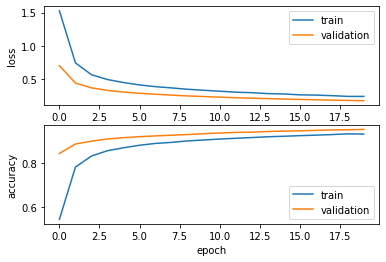

In [ ]:
plot_history(history)

Now, we can estimate the performance on the test set:

## Exercise

* How does the dropout rate choice influence the model performance? Try several rate values in both layers to have some insights. Keep it simple, a couple of extreme values should be enough.
